In [1]:
# Import all the necessary libraries
import pandas as pd
import os 
import glob
import numpy as np
from scipy import stats
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read all csv files in directory
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Test 4.csv', 'Test 5.csv', 'Test 2.csv', 'Test 3.csv', 'Test 1.csv']

In [4]:
# Create a dataframe by combining all 5 csv files 
df1 = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [5]:
# AS null values are negligiable in count so dropping all the null values
df1.dropna(inplace=True)

In [6]:
# Converting date columns into Pandas DateTime format
date_cols = df1.columns[10:14]
df1[date_cols] = df1[date_cols].apply(pd.to_datetime, errors='coerce')

In [7]:
# Creating new colummn which show difference between Manufacturing Date and Repair date in months
df1['FAULT_MONTHS'] = round((df1['REPAIR_DATE'] - df1['FCOK_DATE']) / np.timedelta64(1, 'M'))

In [8]:
# Creating new colummn which shows Usage Month (difference between Registration Date and Repair date in months)
df1['USAGE_MONTHS'] = round((df1['REPAIR_DATE'] - df1['REGD_DATE']) / np.timedelta64(1, 'M'))

In [12]:
# After EDA we found out 99% odometer reading are under 40000 so removing values greter than 40000
df2 = df1[df1['ODOMETER'] <= 40000]

In [13]:
# After EDA we found out 99% fault month values are under 28 months so removing values greter than 28 months
df3 = df2[df2['FAULT_MONTHS'] <= 28]

In [9]:
df1.head()

,Part Name,Attribution code,Model,Fuel Type,Section,CITY,REGION,VEND_CODE,ODOMETER,PLANT_CODE,FCOK_DATE,REGD_DATE,REPAIR_DATE,PROCESSING_DATE,FAULT_MONTHS,USAGE_MONTHS
0,Part 14,E,Model 14,DIESEL MODELS,Transmission,ALLAHABAD,N3,F031,27369,6,2019-01-18,2019-01-30,2021-01-15,2021-04-08,24.0,24.0
1,Part 14,E,Model 15,DIESEL MODELS,Transmission,NAWANSHAHR,N2,F031,16182,B,2019-10-09,2019-10-30,2021-03-19,2021-04-07,17.0,17.0
2,Part 14,E,Model 15,DIESEL MODELS,Transmission,NASIK,W2,F031,13533,B,2019-06-05,2019-07-31,2021-03-01,2021-04-07,21.0,19.0
3,Part 14,E,Model 14,DIESEL MODELS,Transmission,THANE,W1,F031,22401,6,2018-11-11,2019-01-31,2021-01-24,2021-04-18,26.0,24.0
4,Part 14,E,Model 13,DIESEL MODELS,Transmission,THANE,W1,F031,17892,6,2018-12-10,2019-06-29,2021-03-21,2021-04-18,27.0,21.0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139689 entries, 0 to 140005
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Part Name         139689 non-null  object        
 1   Attribution code  139689 non-null  object        
 2   Model             139689 non-null  object        
 3   Fuel Type         139689 non-null  object        
 4   Section           139689 non-null  object        
 5   CITY              139689 non-null  object        
 6   REGION            139689 non-null  object        
 7   VEND_CODE         139689 non-null  object        
 8   ODOMETER          139689 non-null  int64         
 9   PLANT_CODE        139689 non-null  object        
 10  FCOK_DATE         139689 non-null  datetime64[ns]
 11  REGD_DATE         139689 non-null  datetime64[ns]
 12  REPAIR_DATE       139689 non-null  datetime64[ns]
 13  PROCESSING_DATE   139689 non-null  datetime64[ns]
 14  FAUL

In [11]:
# Converting Processing date into month for plotting purpose
df1['PROCESSING_MONTH'] = df1['PROCESSING_DATE'].dt.to_period('M')

In [12]:
#Converting Manufacturing date into month for plotting purpose
df1["FCOK_MONTH"] = df1["FCOK_DATE"].dt.to_period('M')

In [13]:
#Dropping columns which are not necessary for GUI development
df = df1.drop(['Attribution code', 'Fuel Type', 'Section',
       'CITY', 'REGION', 'VEND_CODE', 'PLANT_CODE','FCOK_DATE',
       'REGD_DATE', 'REPAIR_DATE', 'PROCESSING_DATE'], axis = 1)

In [14]:
df.head()

,Part Name,Model,ODOMETER,FAULT_MONTHS,USAGE_MONTHS,PROCESSING_MONTH,FCOK_MONTH
0,Part 14,Model 14,27369,24.0,24.0,2021-04,2019-01
1,Part 14,Model 15,16182,17.0,17.0,2021-04,2019-10
2,Part 14,Model 15,13533,21.0,19.0,2021-04,2019-06
3,Part 14,Model 14,22401,26.0,24.0,2021-04,2018-11
4,Part 14,Model 13,17892,27.0,21.0,2021-04,2018-12


df.to_csv('data.csv', index=False)

sns.distplot(df['ODOMETER'], kde=True,hist= False, bins=50,
             hist_kws=dict(edgecolor="k", linewidth=2))
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

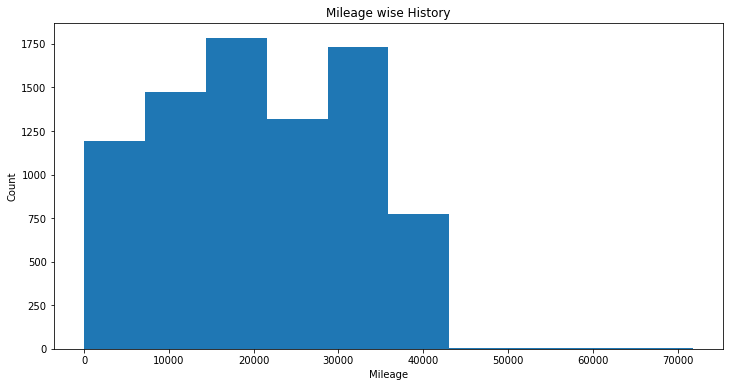

In [43]:
#Mileage wise History
plt.figure(figsize=(12, 6))
plt.hist(x = "ODOMETER", data = df[df['Part Name']=='Part 3'])
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.title("Mileage wise History")
plt.show()

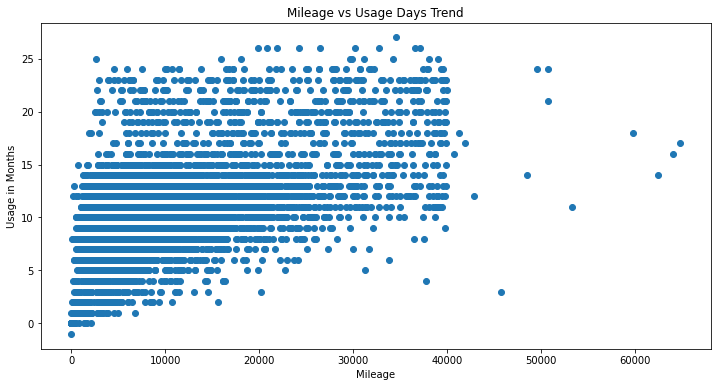

In [44]:
#Mileage vs Usage Days Trend
plt.figure(figsize=(12, 6))
plt.scatter(x = "ODOMETER", y = "USAGE_MONTHS", data = df[df['Part Name']=='Part 6'])
plt.xlabel("Mileage")
plt.ylabel("Usage in Months")
plt.title("Mileage vs Usage Days Trend")
plt.show()

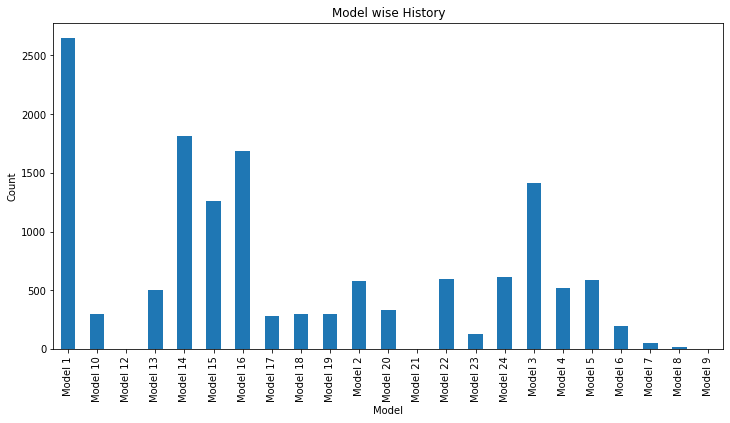

In [45]:
# Model wise History
df[df['Part Name']=='Part 2'].groupby(['Model']).size().plot.bar(x = 'Model',figsize=(12,6))
#.groupby(['Model']).size().reset_index(name = 'count')
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Model wise History")
plt.show()

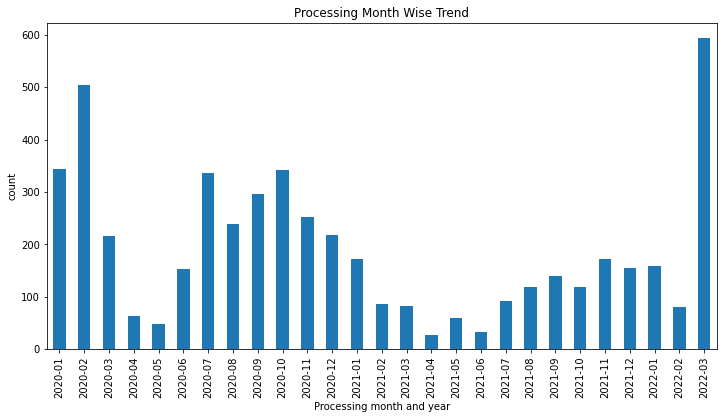

In [46]:
## Processing month wise trend
df[df['Part Name']=='Part 11'].groupby(['PROCESSING_MONTH']).size().plot.bar(x = 'PROCESSING_MONTH',figsize=(12,6))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Processing Month Wise Trend")
plt.xlabel("Processing month and year")
plt.ylabel("count")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(x = "ODOMETER", data = df[df['Part Name']=='Part 3'])
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.title("Mileage wise History")
plt.show()

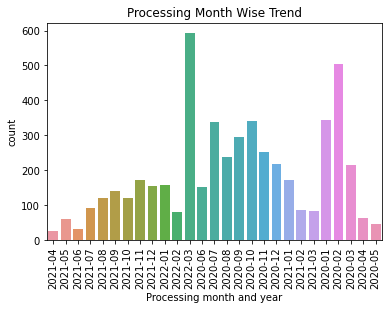

In [55]:
sns.countplot(x ='PROCESSING_MONTH', data = df[df['Part Name'] == 'Part 11'])
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Processing Month Wise Trend")
plt.xlabel("Processing month and year")
plt.ylabel("count")
plt.show()